#### **Time Integration**

**Work the following problems**

* Problem C0
* Problem Set 7.1, pp. 264-266: Problems 8, 10, 13, 15

Some problems will have both a by hand portion and a code portion.

**1. C0**

Write Python functions that perform the following time integration schemes:
 * Euler Method
 * Midpoint Method
 * Heun's Method

Each function should have at least 5 inputs:
* The first order equation(s) to be integrated
* The initial condition(s)
* The step size
* The starting point of integration
* The ending point of integration

We recommend outputting lists or arrays containing the state (e.g., the time, position, velocity, etc.) recorded at every time step. This will allow you to easily plot the evolution of the system and pick out a value at any time step more easily.

These functions **must** be used in the problems below. To help you practice, we **strongly recommend** that you first try hand calculations before you start coding so that you can check your code. Examples from the class notes and textbook may be useful to do the same.


In [223]:
#C0

import numpy as np
import matplotlib.pyplot as plt

#can't really make a very generalized function
#will slightly adjust the function for each question

#created lists as we went, more intuitive, very much like doing it by hand in that way

def eulerMethodQ8(ddf, c1, c2, h, a, b):

    t = np.arange(a, b + h, h)

    #initial conditions
    #making lists we add to along the way
    y_sol = [c1]
    yp_sol = [c2]

    for i in range(len(t)-1): #be very careful with indexing here
        yp_sol.append(yp_sol[i] + ddf(yp_sol[i])*h)
        y_sol.append(y_sol[i] + yp_sol[i]*h)

    plt.scatter(t, y_sol, color = "red")
    print(f"Euler:\n{y_sol}")

#theoretically works
def midpointMethodQ8(ddf, c1, c2, h, a, b):

    t = np.arange(a, b + h, h)

    y_sol = [c1]
    yp_sol = [c2]

    for i in range(len(t)-1): #be very careful with indexing here
        yp_sol.append((yp_sol[i] + ddf(yp_sol[i]) * (h/2))) #this is the part that is getting the slope
        y_sol.append(y_sol[i] + yp_sol[i+1] * h)
        yp_sol[i+1] = ((yp_sol[i] + ddf(yp_sol[i]) * (h))) #replaces the slope to set up for the next iteration

    plt.scatter(t, y_sol, color = "blue")
    print(f"Midpoint:\n{y_sol}")

#theoretically works
def heunMethodQ8(ddf, c1, c2, h, a, b): 

    t = np.arange(a, b + h, h)

    y_sol = [c1]
    yp_sol = [c2]
    
    for i in range(len(t) -1): #usually more accurate and less painful than midpoint 
        yp_sol.append(yp_sol[i] + ddf(yp_sol[i]) * h) #passing in the velocity again
        y_sol.append(y_sol[i] + (yp_sol[i] + yp_sol[i+1]) * (h/2))

    plt.scatter(t, y_sol, color = "green")
    print(f"Heun:\n{y_sol}")

**2. Textbook Problem 8**

**Modification: Determine the time of a 500 m fall instead of 5000 m.** This makes the time determination a little easier. Note that a normal jump would be from considerably higher than 500m. Solve the second order ODE (given in the problem) in three ways:
* Euler Method
* Midpoint Method
* Heun's Method

You will explore the effect of both the choice of algorithm and the time increment on the prediction.

**Tasks:**
* **By hand,** use a time increment of 0.5 seconds to do the calculation for the first 2 time increments with all three algorithms.
* **Using the codes** you wrote earlier, integrate to time = 20 seconds.
* Explore the effect of time increment on your prediction. Adjust the time increment to obtain what you feel is a pretty accurate prediction. Be sure to document your exploration. Include tabulated results and plots to support your claim of a “pretty accurate” prediction.
* Plot the time history of the height for all methods and use it to estimate the fall time. You may perform the estimation manually (i.e., eyeball it), though there are better ways that have been covered in class.



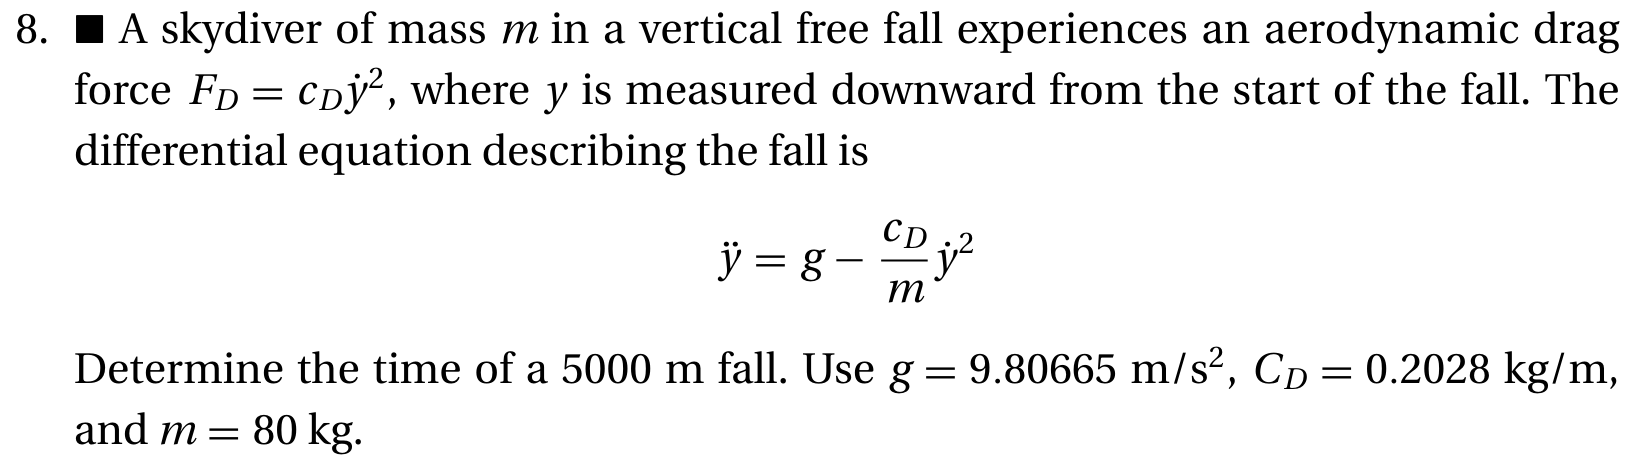

Testing time step of 1s:
Euler:
[500, 500, 490.19335, 470.82384192400406, 442.598759680282, 406.5865485400904, 364.05527655520535, 316.3029391303338, 264.5244760298431, 209.73572135541127, 152.74989904527428, 94.18954503409623, 34.51585470487143, -25.937479104470036, -86.93303779724911, -148.303885003109, -209.9336066610196, -271.7414840491443, -333.6717696894524, -395.686067021253, -457.7579796115867]
Midpoint:
[500, 495.096675, 480.508595962002, 456.711300802143, 424.5926541101862, 385.3209125476478, 340.1791078427695, 290.4137075800884, 237.13009869262712, 181.24281020034272, 123.4697220396852, 64.35269986948379, 4.289187800200651, -56.435258450859614, -117.61846140017909, -179.11874583206435, -240.837545355082, -302.7066268692984, -364.6789183553528, -426.7220233164199, -488.81368185015515]
Heun:
[500, 495.096675, 480.508595962002, 456.711300802143, 424.5926541101862, 385.3209125476478, 340.1791078427695, 290.4137075800884, 237.13009869262712, 181.24281020034272, 123.4697220396852,

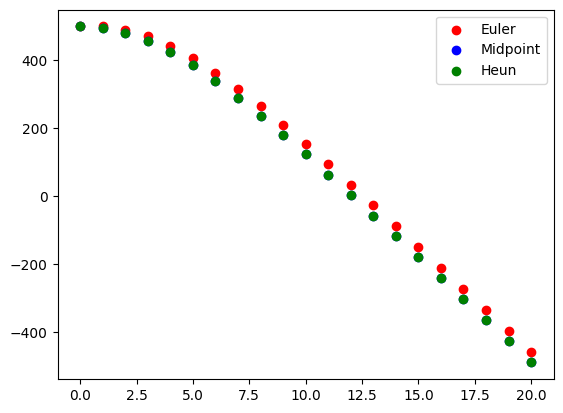

Testing time step of .75s:
Euler:
[500, 500.0, 494.483759375, 483.52841541345435, 467.36108041484425, 446.34010998886083, 420.92306777392037, 391.6274609325935, 358.9912330570777, 323.5388522993664, 285.7563996656781, 246.0764537049776, 204.87161983178794, 162.45456551159927, 119.08225903681726, 74.96244485330428, 30.260914583886148, -14.89135135116775, -60.39168466437963, -106.1600979619516, -152.13456657712794, -198.26716859442902, -244.52098122060235, -290.8676169842468, -337.2852863837402, -383.75728532589505, -430.27082054485203, -476.81610117884634]
Midpoint:
[500, 497.2418796875, 489.00608739422717, 475.44474791414933, 456.85059520185257, 433.63158888139066, 406.275264353257, 375.30934699483566, 341.26504267822213, 304.6476259825223, 265.9164266853279, 225.47403676838283, 183.66309267169368, 140.76841227420834, 97.02235194506085, 52.61167971859529, 7.684781616359281, -37.641518007773605, -83.27589131316553, -129.14733226953967, -175.20086758577838, -221.3940749075156, -267.69429

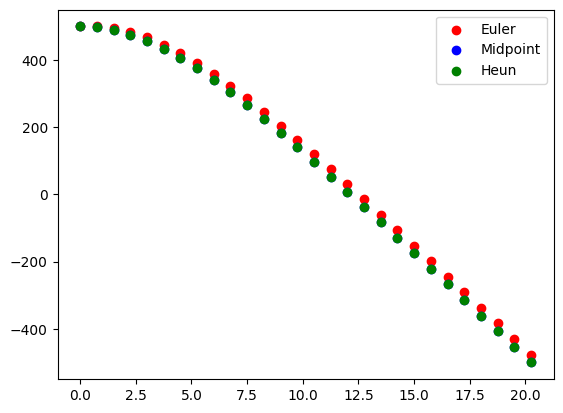

Time step of .5s:
Euler:
[500, 500.0, 497.5483375, 492.66024949525024, 485.3810687705079, 475.7845462523451, 463.9698176088417, 450.05728157108956, 434.1837542339069, 416.49730548248925, 397.1521687710932, 376.3040535466571, 354.10609813004373, 330.705599497989, 306.24156212327426, 280.8430321796016, 254.62813103049356, 227.70367272350828, 200.16524048026383, 172.09760164682336, 143.575353919833, 114.66371338288113, 85.41937364582289, 55.89138302463883, 26.12200205682097, -3.8524837414669477, -34.00101109961494, -64.29705402353517, -94.71800914774568, -125.24465028740968, -155.86064872522468, -186.5521543845669, -217.30743234662822, -248.1165489530921, -278.97110183606674, -309.86398851484444, -340.78920860959545, -371.7416951862477, -402.7171712248206, -433.71202766979945, -464.7232199602546]
Midpoint:
[500, 498.77416875, 495.1042934976251, 489.0206591328791, 480.5828075114265, 469.8771819305934, 457.01354958996563, 442.1205179024982, 425.340529858198, 406.82473712679115, 386.72811115

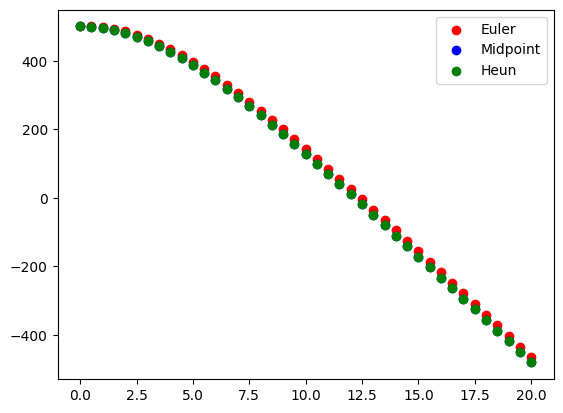


Euler falls behind while Midpoint and Heun track pretty accurately. 
Different time steps show nearly the exact same shape.
The skydiver is killed after about 12 seconds in freefall.

Testing time step of .25s:
Euler:
[500, 500.0, 499.387084375, 498.1622054372031, 496.3282142069313, 493.88983388457547, 490.85361028316163, 487.2278403440238, 483.0224804162826, 478.2490364706703, 472.92043881966134, 467.05090421432067, 460.65578837546514, 453.75143209082125, 446.35500397519036, 438.4843428569441, 430.1578025355189, 421.39410136798483, 412.2121788068707, 402.63106064511953, 392.66973434532497, 382.3470354554156, 371.68154575536863, 360.6915034501451, 349.3947254306436, 337.80854137197355, 325.9497392290434, 313.8345215233655, 301.4784716903294, 288.8965296698462, 276.1029758711552, 263.11142262012226, 249.93481219973097, 236.58542061694257, 223.07486626717778, 209.4141227172672, 195.61353488519944, 181.68283795726612, 167.63117844766904, 153.46713687023018, 139.1987515548931, 124.8335432

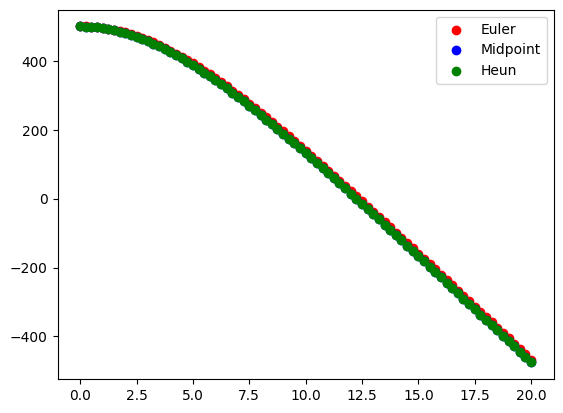

In [224]:
#Q8

g = 9.80665 #magnitude
cd = .2028
m = 80

def ddf(v): #takes in velocity
    return -1 * (g - (cd/m)*v**2)


print(f"Testing time step of 1s:")
eulerMethodQ8(ddf, 500, 0, 1, 0, 20)
midpointMethodQ8(ddf, 500, 0, 1, 0, 20)
heunMethodQ8(ddf, 500, 0, 1, 0, 20)
plt.legend(["Euler", "Midpoint", "Heun"])
plt.show()

print(f"Testing time step of .75s:")
eulerMethodQ8(ddf, 500, 0, .75, 0, 20)
midpointMethodQ8(ddf, 500, 0, .75, 0, 20)
heunMethodQ8(ddf, 500, 0, .75, 0, 20)
plt.legend(["Euler", "Midpoint", "Heun"])
plt.show()

# testing time step of .50
print(f"Time step of .5s:")
eulerMethodQ8(ddf, 500, 0, .5, 0, 20)
midpointMethodQ8(ddf, 500, 0, .5, 0, 20)
heunMethodQ8(ddf, 500, 0, .5, 0, 20)
plt.legend(["Euler", "Midpoint", "Heun"])
plt.show()
print(f"\nEuler falls behind while Midpoint and Heun track pretty accurately. \nDifferent time steps show nearly the exact same shape.\nThe skydiver is killed after about 12 seconds in freefall.\n")

print(f"Testing time step of .25s:")
eulerMethodQ8(ddf, 500, 0, .25, 0, 20)
midpointMethodQ8(ddf, 500, 0, .25, 0, 20)
heunMethodQ8(ddf, 500, 0, .25, 0, 20)
plt.legend(["Euler", "Midpoint", "Heun"])
plt.show()



**3. Textbook Problem 10**

This problem is done in Python.

Solve using two methods:
* Euler Method
* Midpoint Method
             
Solve using two time increments:
* h = 0.1 s
* h = 0.01 s

Integrate to time = 6 seconds. For each method and increment, plot the displacement over time, then estimate the period with your most accurate plot.


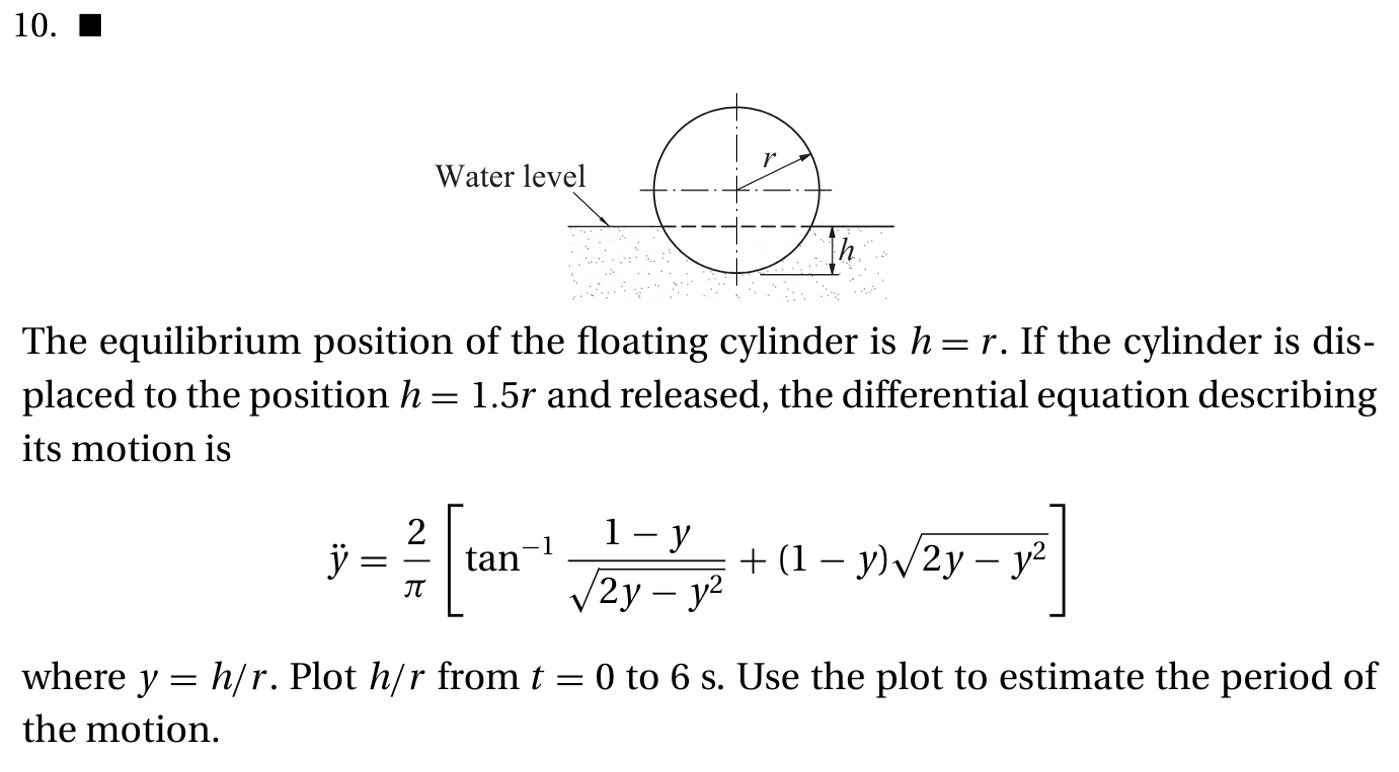

As an example, here is what one of your plots should look like (yours does not need the "Q10" watermark):

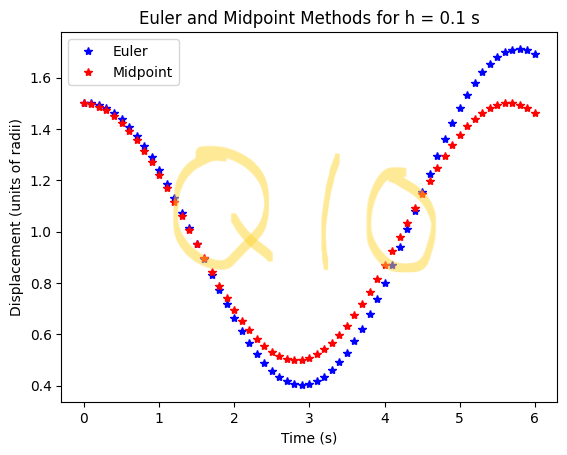

Euler:
[1.5, 1.5, 1.4939100221895576, 1.481730066568673, 1.4635274203337192, 1.4394374582426854, 1.4096644197164485, 1.3744819770460788, 1.3342333338357961, 1.2893305510827104, 1.2402527944686068, 1.1875432298435546, 1.1318043600676027, 1.0736916884257977, 1.0139057033056036, 0.9531822963688862, 0.8922818422249524, 0.8319772717603747, 0.7730415545237338, 0.7162350599038757, 0.662293286310586, 0.6119154288674069, 0.5657541990559085, 0.5244072173568182, 0.4884101784041488, 0.45823184656039756, 0.43427078977055195, 0.4168536150718389, 0.4062343463859595, 0.4025945017871543, 0.40604340028217817, 0.4166182695323523, 0.4342838379420538, 0.4589312644537919, 0.49037645998460916, 0.528358050475989, 0.572535390165791, 0.6224871331136133, 0.6777109032694829, 0.7376245716949521, 0.801569563445811, 0.8688164879685074, 0.9385732279799667, 1.0099954452255315, 1.082199280295576, 1.154275851523536, 1.2253070087971265, 1.2943816850471193, 1.360612122346511, 1.4231492387238296, 1.481196449390413, 1.53402

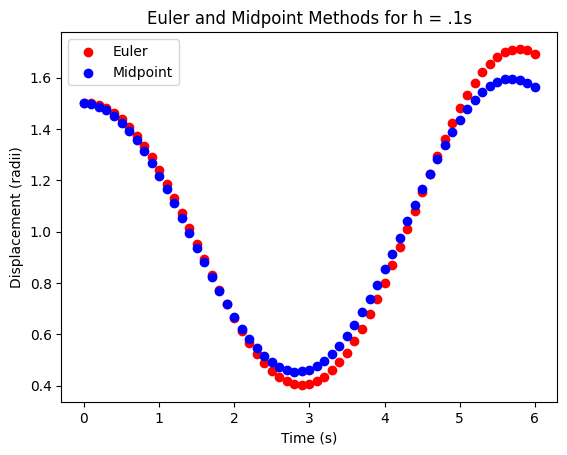

Euler:
[1.5, 1.5, 1.4999391002218956, 1.4998173006656867, 1.4996346080466714, 1.4993910357962625, 1.4990866040628834, 1.498721339712935, 1.4982952763318367, 1.4978084542251322, 1.4972609204196587, 1.4966527286647704, 1.4959839394336094, 1.4952546199244166, 1.4944648440618706, 1.4936146924984466, 1.4927042526157805, 1.4917336185260286, 1.4907028910732063, 1.4896121778344933, 1.488461593121487, 1.487251257981391, 1.4859813001981172, 1.4846518542932867, 1.4832630615271076, 1.4818150698991106, 1.4803080341487225, 1.4787421157556535, 1.4771174829400797, 1.475434310662593, 1.4736927806238993, 1.4718930812642386, 1.4700354077625006, 1.4681199620350143, 1.4661469527339817, 1.464116595245532, 1.4620291116873676, 1.4598847309059768, 1.4576836884733824, 1.4554262266834022, 1.45311259454739, 1.4507430477894305, 1.4483178488409596, 1.4458372668347792, 1.4433015775984412, 1.4407110636469687, 1.4380660141748862, 1.435366725047532, 1.4326134987916195, 1.4298066445850237, 1.4269464782457606, 1.42403332

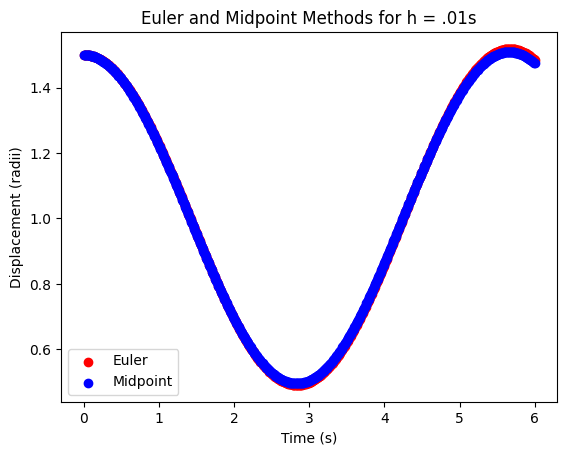

Referencing the .01s increment, the period is estimated to be about 5.75 seconds.


In [225]:
#Q10

from numpy import pi, sqrt, arctan, sin, cos

def ddf(y):
  return (2/pi) * (arctan((1 - y)/(sqrt((2*y) - (y**2)))) + (1 - y) * (sqrt((2*y) - (y**2))))

def eulerMethodQ10(ddf, c1, c2, h, a, b):

    t = np.arange(a, b + h, h)

    #initial conditions
    #making lists we add to along the way
    y_sol = [c1]
    yp_sol = [c2]

    for i in range(len(t)-1): #be very careful with indexing here
        #SMALL CHANGE HERE IN THE FIRST LINE
        #instead of yp_sol in the second part, it's y_sol (not like a velocity anymore)
        yp_sol.append(yp_sol[i] + ddf(y_sol[i])*h)  
        y_sol.append(y_sol[i] + yp_sol[i]*h)

    plt.scatter(t, y_sol, color = "red")
    print(f"Euler:\n{y_sol}")

#theoretically works
def midpointMethodQ10(ddf, c1, c2, h, a, b):

    t = np.arange(a, b + h, h)

    y_sol = [c1]
    yp_sol = [c2]

    for i in range(len(t)-1): #be very careful with indexing here
        yp_sol.append((yp_sol[i] + ddf(y_sol[i]) * (h/2))) #again, y_sol not yp_sol in the second part
        y_sol.append(y_sol[i] + yp_sol[i+1] * h)
        yp_sol[i+1] = ((yp_sol[i] + ddf(y_sol[i]) * (h))) #needs to be present here too

    plt.scatter(t, y_sol, color = "blue")
    print(f"Midpoint:\n{y_sol}")

eulerMethodQ10(ddf, 1.5, 0, .1, 0, 6)
midpointMethodQ10(ddf, 1.5, 0, .1, 0, 6)

plt.legend(["Euler", "Midpoint"])
plt.ylabel("Displacement (radii)")
plt.xlabel("Time (s)")
plt.title("Euler and Midpoint Methods for h = .1s")
plt.show()

eulerMethodQ10(ddf, 1.5, 0, .01, 0, 6)
midpointMethodQ10(ddf, 1.5, 0, .01, 0, 6)
plt.legend(["Euler", "Midpoint"])
plt.ylabel("Displacement (radii)")
plt.xlabel("Time (s)")
plt.title("Euler and Midpoint Methods for h = .01s")
plt.show()

print(f"Referencing the .01s increment, the period is estimated to be about 5.75 seconds.")

**4. Textbook Problem 13**

This problem is done in Python.

There are 2 second order ODEs, which means you will have 4 first order ODEs to integrate.

Solve using two methods:
* Euler Method  
* Midpoint Method

Solve using two time increments:
* h = 0.1 s
* h = 0.01 s

Integrate to time = 4 seconds. For each method and increment, plot the height and range over time. Estimate the time of flight and range using your most accurate plots.

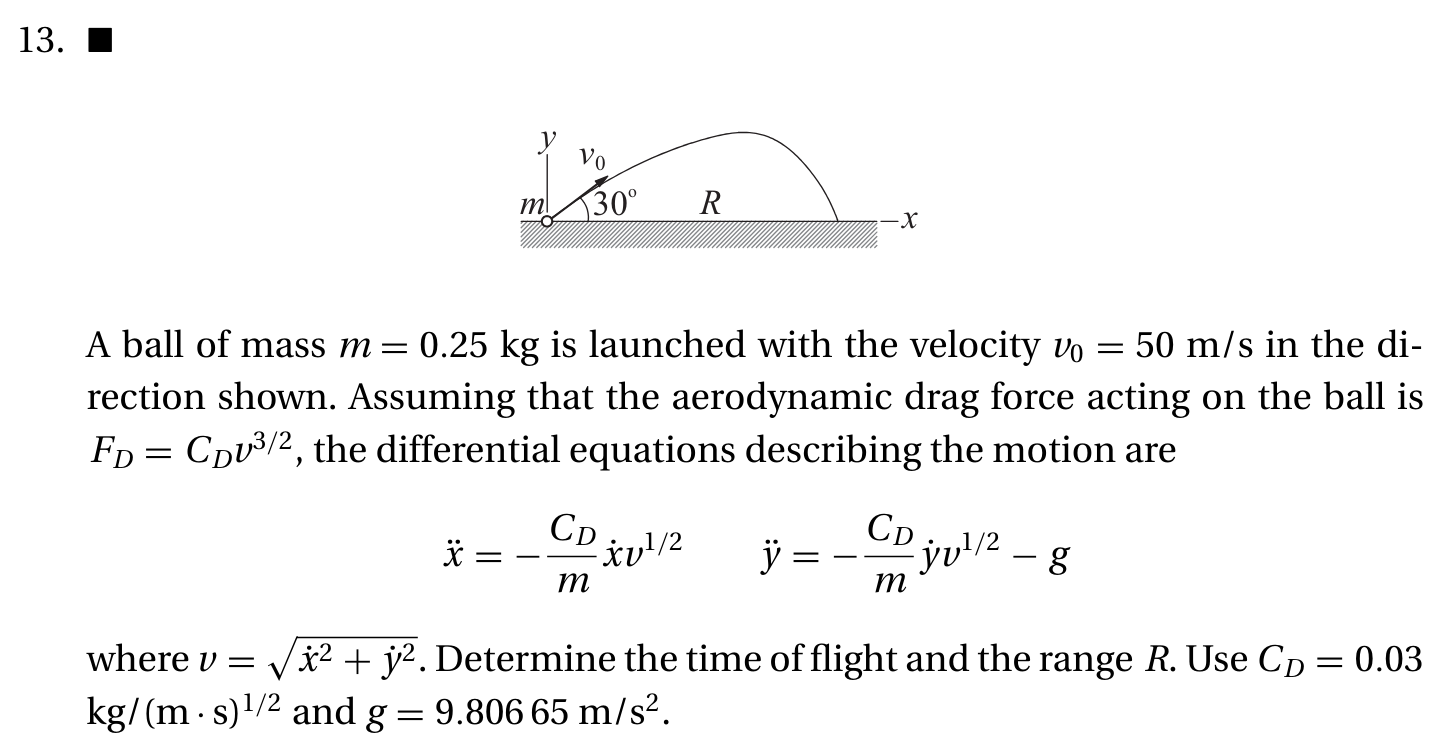

As an example, here is what one of your plots should look like (yours does not need the "Q13" watermark):

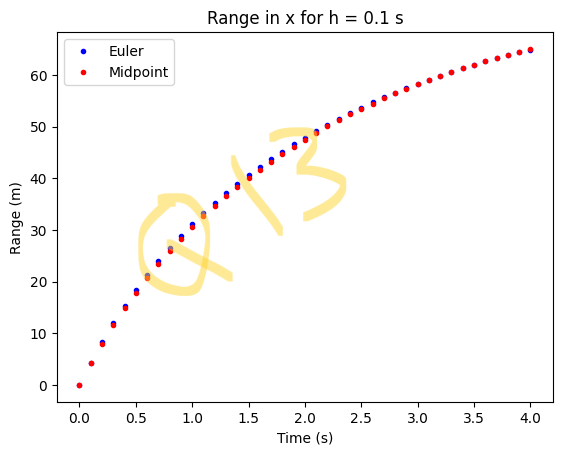

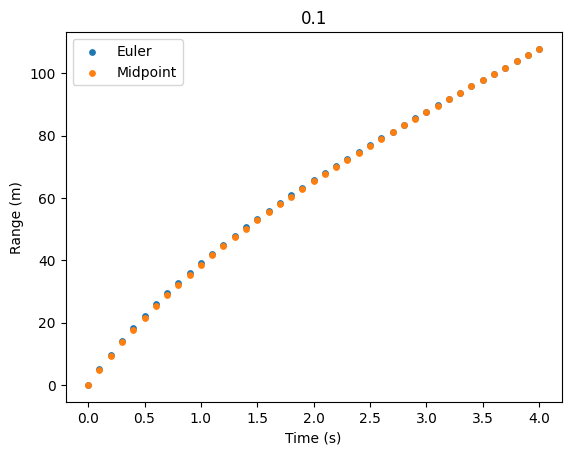

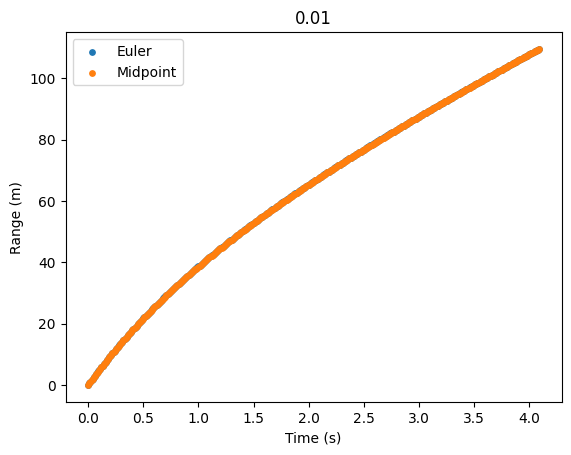

The time of flight and range are approximately 4 seconds and 63m respectively.


In [226]:
# Q13

#doing this a little different than before, this was from the last problem in the Lab that we didn't quite cover
#this is instead of doing the whole ddf1 and ddf2 stuff

v_0 = 50
cd = .03
m = .25

rx0 = 0
ry0 = 0
vx0 = 50 * cos(30)                       
vy0 = 50 * sin(30)

q0 = np.array([[rx0],[ry0],[vx0],[vy0]])

def EOM(q):
  r = np.sqrt(q[2]**2 + q[3]**2)
  F = np.zeros((4,4))
  F[0:2, 2:4] = np.identity(2)
  F[2, 2] =- ((cd/m) * r**.5) #this is like my ddf1
  F[3, 3] =- ((cd/m) * r**.5) - g/q[3] #and my ddf2

  dq = F@q
  return dq.T

# step size
hs = [.1, .01]

for h in hs:
  # number of steps in one orbit
  t = np.arange(0, 4.1, h)

  #Euler Method
  q_euler = np.zeros((len(t),4))
  #q_euler.shape()
  q_euler[0,:] = q0.T

  for i in range(1,len(t)):
    q_euler[i,:] = q_euler[i-1,:] + EOM(q_euler[i-1,:].T)*h

  plt.scatter(t, np.sqrt(q_euler[:,1]**2 + q_euler[:,0]**2), s=15)

  q_midpoint = np.zeros((len(t),4))
  q_midpoint[0,:]=q0.T

  for i in range(len(t) -1):
    dq = q_midpoint[i, :] + EOM(q_midpoint[i, :].T)*(h/2)
    q_midpoint[i+1, :] = q_midpoint[i, :] + EOM(dq.T)*h

  plt.scatter(t, np.sqrt(q_midpoint[:,1]**2 + q_midpoint[:,0]**2), s=15)
  plt.title(h)
  plt.xlabel("Time (s)")
  plt.ylabel("Range (m)")
  plt.legend(["Euler", "Midpoint"])
  plt.show()

print("The time of flight and range are approximately 4 seconds and 63m respectively.")

**5. Textbook Problem 15**

This problem is done in Python.

Solve using two methods:
* Euler Method
* Midpoint Method
             
Solve using two time increments:
* h = 0.025 s
* h = 0.0025 s

Integrate to time = 1 second. For each method and increment, plot the pendulum angle and cord length over time. Use them to estimate the cord length when the angle is zero for the first time.

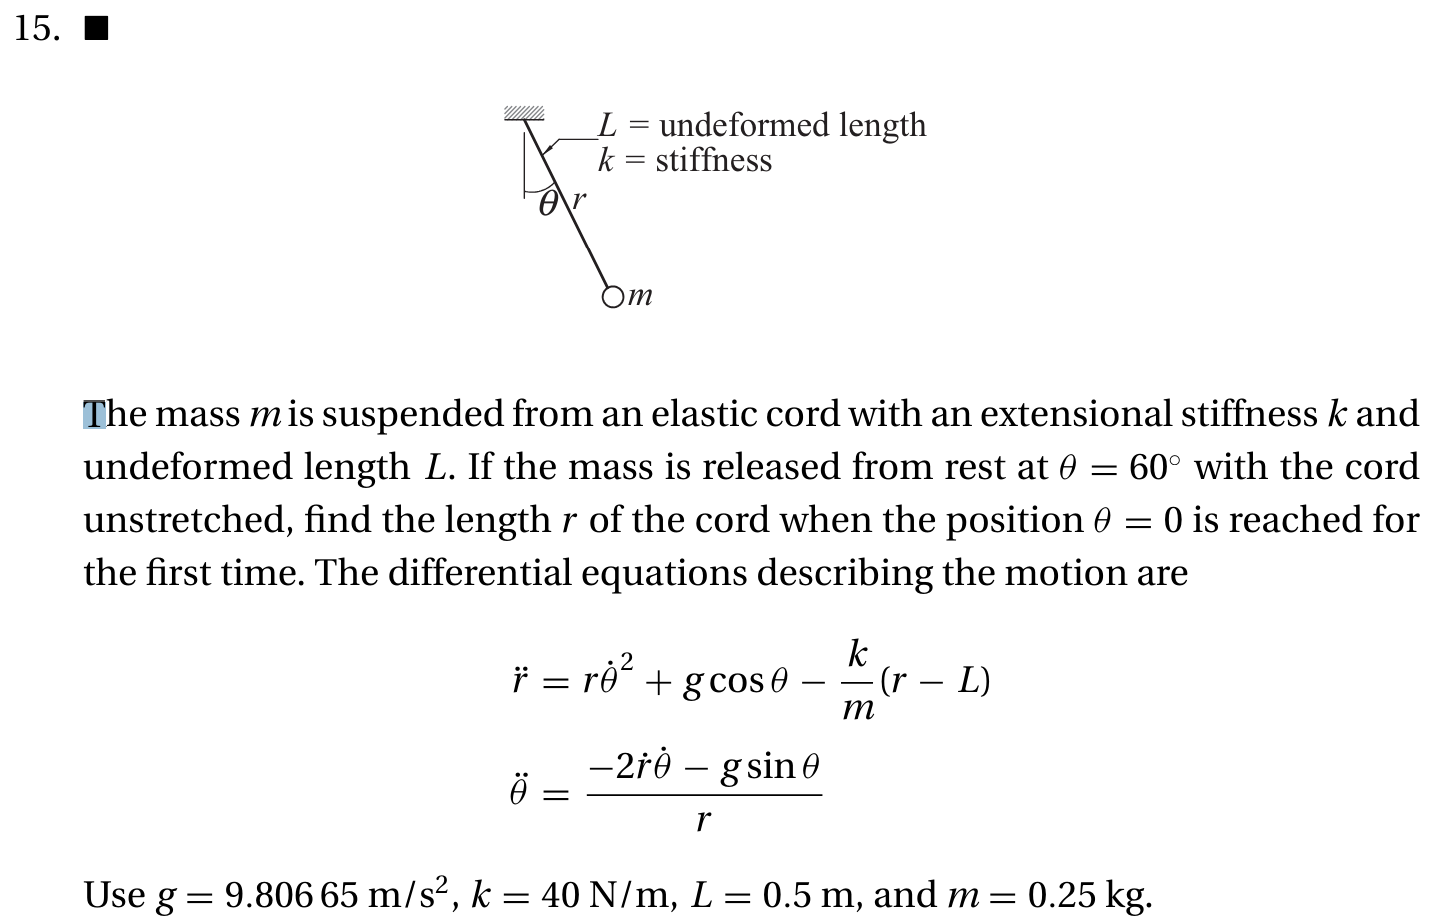

As an example, here is what one of your plots should look like (yours does not need the "Q15" watermark):

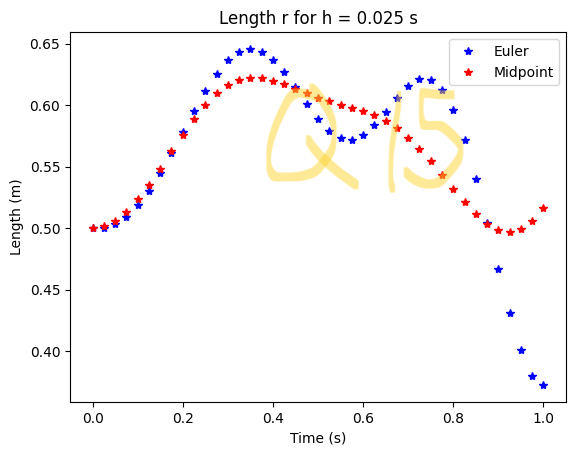

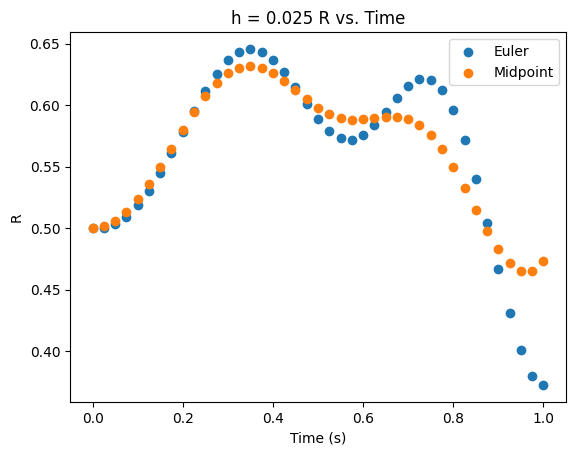

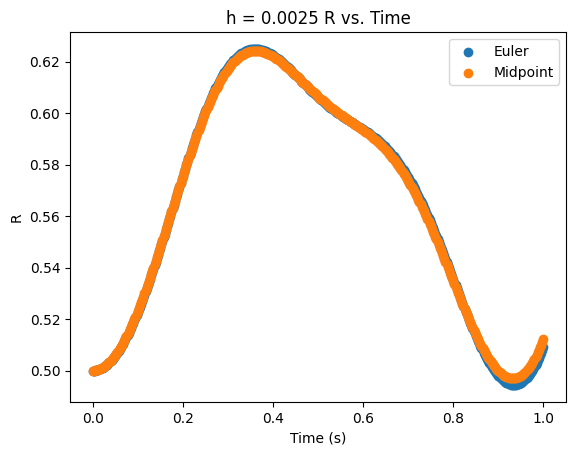

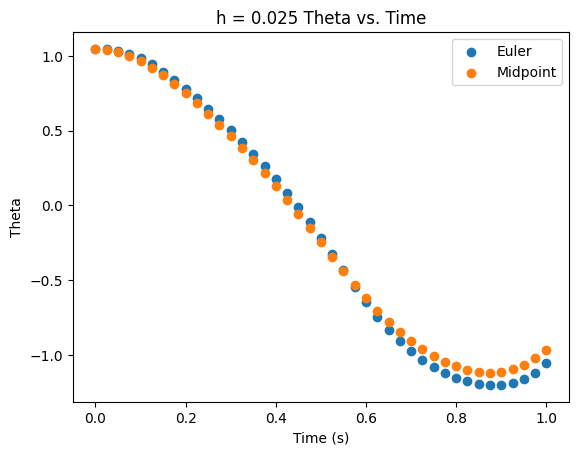

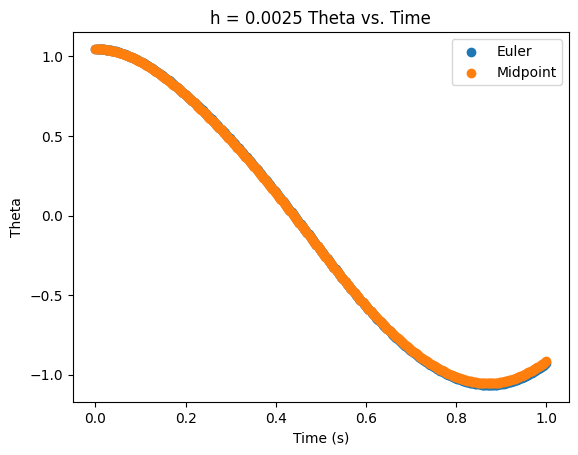


R is approximately .63 when the position theta = 0.


In [227]:
#Q15

k = 40
L = .5
m = .25
gravity = 9.80665

def ddr(r, O, Op):
  return r * (Op**2) + gravity * cos(O) - (k/m)*(r - .5)

def ddO(r, rp, O, Op):
  return ((-2 * rp * Op - (gravity * sin(O)))/r)

def eulerMethodQ15(ddr, ddO, c1, c2, hs, a, b):
    for j in range(2):
        
        for h in hs:
            
            t = np.arange(a, b + h, h)

            r_sol = [c1[0]]
            rp_sol = [c2[0]]
            O_sol = [c1[1]]
            Op_sol = [c2[1]]

            for i in range(len(t) - 1):
                rp_sol.append(rp_sol[i] + ddr(r_sol[i], O_sol[i], Op_sol[i])*h)
                r_sol.append(r_sol[i] + rp_sol[i] * h)

                Op_sol.append(Op_sol[i] + ddO(r_sol[i], rp_sol[i], O_sol[i], Op_sol[i])*h)
                O_sol.append(O_sol[i] + Op_sol[i] * h)

            g = [r_sol, O_sol]
            plt.scatter(t, g[j])

            #midpoint below, combined for plotting purposes
            
            r_sol = [c1[0]]
            rp_sol = [c2[0]]
            O_sol = [c1[1]]
            Op_sol = [c2[1]]

            for i in range(len(t) - 1):
                rp_sol.append((rp_sol[i] + ddr(r_sol[i], O_sol[i], Op_sol[i]) * (h/2)))
                r_sol.append(r_sol[i] + rp_sol[i+1] * h)
                rp_sol[i+1] = ((rp_sol[i] + ddr(r_sol[i], O_sol[i], Op_sol[i]) * (h)))

                Op_sol.append((Op_sol[i] + ddO(r_sol[i], rp_sol[i], O_sol[i], Op_sol[i]) * (h/2)))
                O_sol.append(O_sol[i] + Op_sol[i+1] * h)
                Op_sol[i+1] = ((Op_sol[i] + ddO(r_sol[i], rp_sol[i], O_sol[i], Op_sol[i]) * (h)))

            g = [r_sol, O_sol]
            m = ["R", "Theta"]
            plt.scatter(t, g[j])
            plt.title(f"h = {h} {m[j]} vs. Time")
            plt.xlabel("Time (s)")
            plt.ylabel(m[j])
            plt.legend(["Euler", "Midpoint"])
            plt.show()

eulerMethodQ15(ddr, ddO, [L, pi/3], [0,0], [.025,.0025], 0, 1)

print("\nR is approximately .63 when the position theta = 0.")